In [51]:
import numpy as np
import pandas as pd

import missingno

In [52]:
df = pd.read_csv('fifa_eda.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [54]:
df.isna().sum(axis=0).sort_values(ascending=False)

Contract Valid Until        289
Value                       252
Club                        241
International Reputation     48
Skill Moves                  48
ID                            0
Weight                        0
Height                        0
Joined                        0
Position                      0
Preferred Foot                0
Name                          0
Wage                          0
Potential                     0
Overall                       0
Nationality                   0
Age                           0
Release Clause                0
dtype: int64

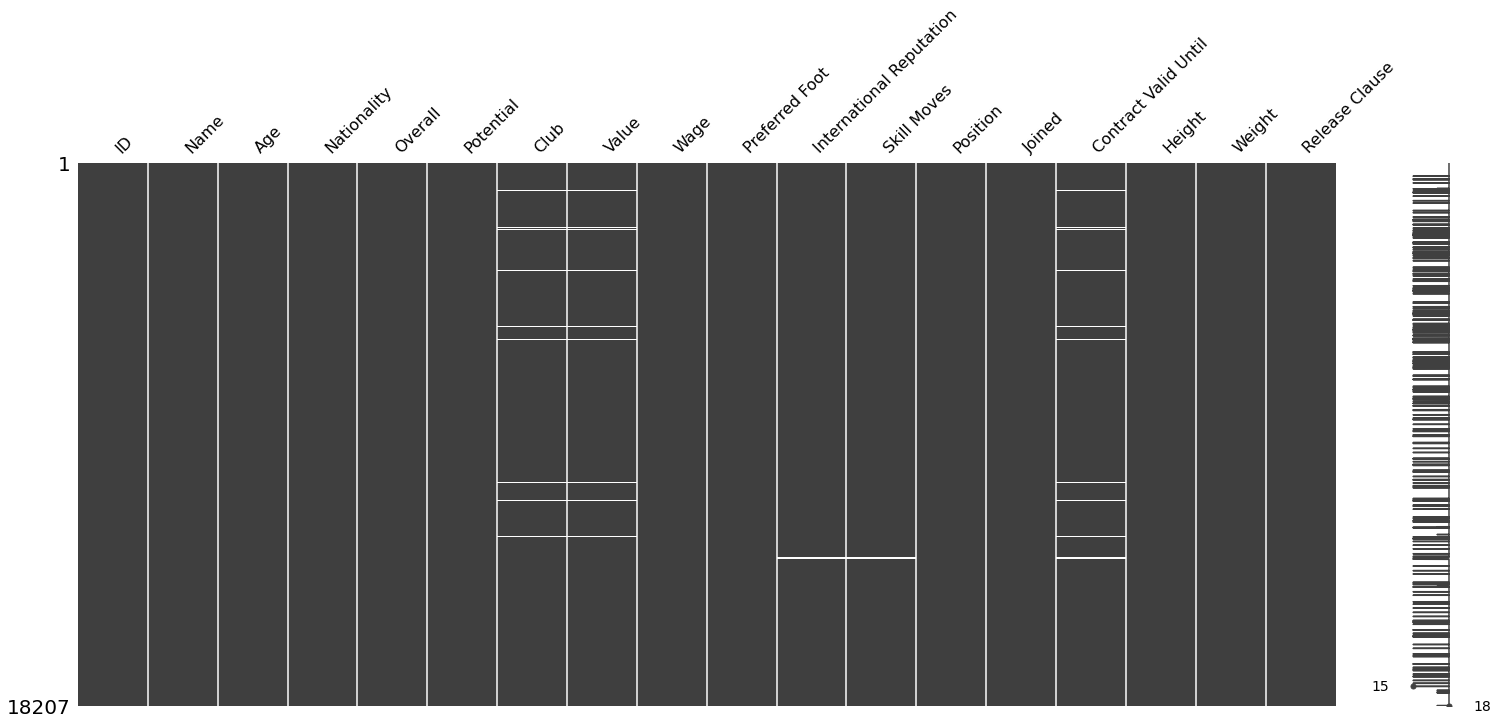

In [55]:
missingno.matrix(df);

<AxesSubplot:>

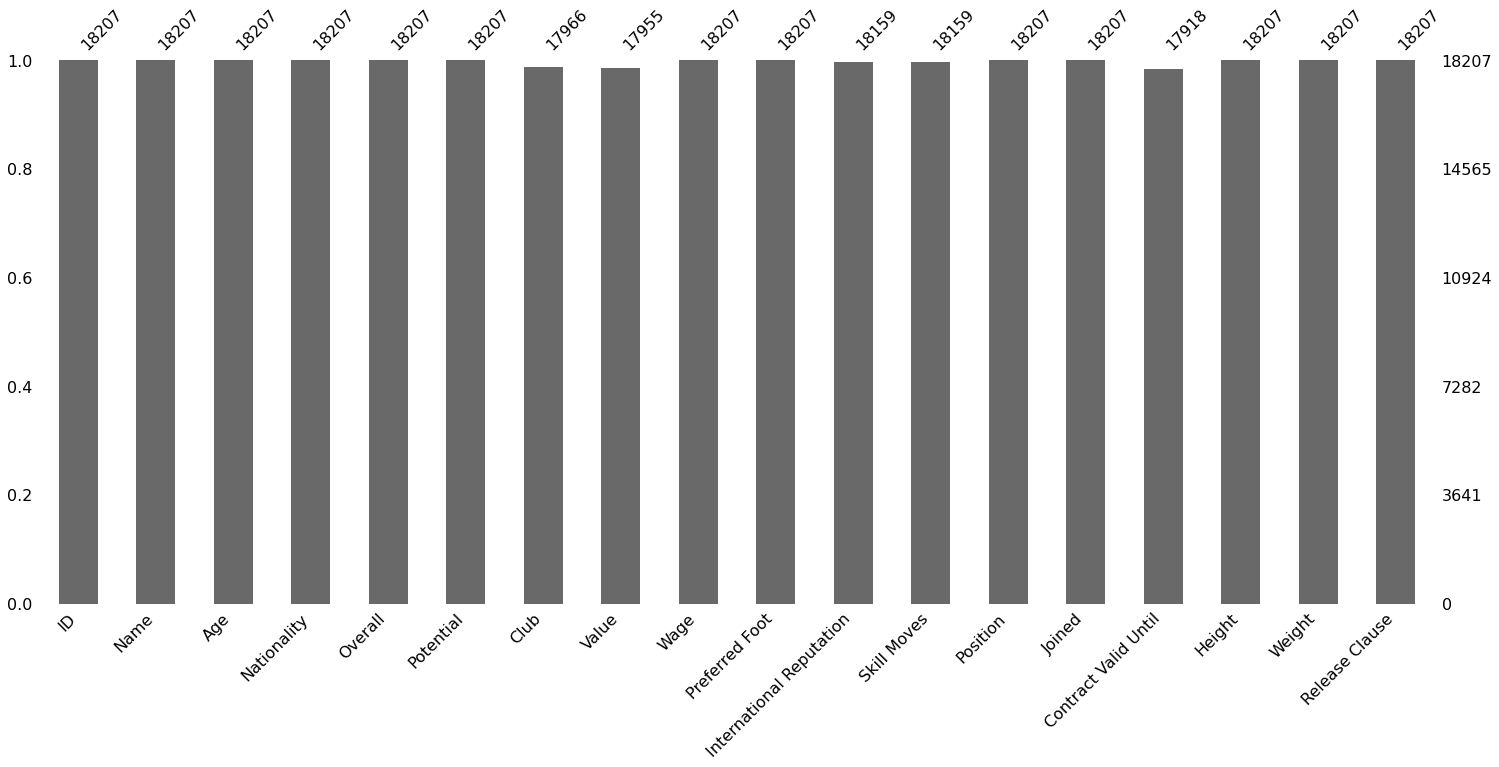

In [56]:
missingno.bar(df)

<AxesSubplot:>

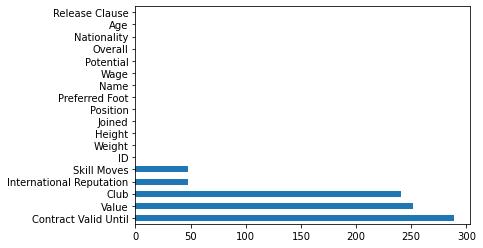

In [57]:
df.isna().sum(axis=0).sort_values(ascending=False).plot(kind='barh')

In [58]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,Release Clause
count,18207.000000,18207.000000,18207.000000,18207.000000,17955.000000,18207.000000,18159.000000,18159.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2444.530214,9.731312,1.113222,2.361308,2016.420607,5.946771,165.979129,4585.060971
std,29965.244204,4.669943,6.908930,6.136496,5626.715434,21.999290,0.394031,0.756164,2.018194,0.220514,15.572775,10630.414430
min,16.000000,16.000000,46.000000,48.000000,10.000000,0.000000,1.000000,1.000000,1991.000000,5.083333,110.000000,13.000000
25%,200315.500000,21.000000,62.000000,67.000000,325.000000,1.000000,1.000000,2.000000,2016.000000,5.750000,154.000000,570.000000
50%,221759.000000,25.000000,66.000000,71.000000,700.000000,3.000000,1.000000,2.000000,2017.000000,5.916667,165.000000,1300.000000
75%,236529.500000,28.000000,71.000000,75.000000,2100.000000,9.000000,1.000000,3.000000,2018.000000,6.083333,176.000000,4585.060806
max,246620.000000,45.000000,94.000000,95.000000,118500.000000,565.000000,5.000000,5.000000,2018.000000,6.750000,243.000000,228100.000000


### `What is the mean, median of Age`

In [59]:
df['Age'].mean(), df['Age'].median()

(25.122205745043114, 25.0)

In [60]:
## What is the greatest Height, Name
df[['Name', 'Height']].sort_values(by='Height', ascending=False).iloc[:2]

,Name,Height
11614,T. Holý,6.75
17927,D. Hodzic,6.75


In [61]:
max_height = df['Height'].max()

df[df['Height']==max_height][['Name', 'Club']]

,Name,Club
11614,T. Holý,Gillingham
17927,D. Hodzic,Vejle Boldklub


In [62]:
## what is the smallest weight, Name of players, club
df[['Name', 'Weight', 'Club']].sort_values(by='Weight', ascending=True).iloc[:2]

,Name,Weight,Club
13338,B. Al Mutairi,110.0,Al Batin
17157,K. Yamaguchi,110.0,Shonan Bellmare


In [63]:
min_weight = df['Weight'].min()

df[df['Weight']==min_weight][['Name', 'Club']]

,Name,Club
13338,B. Al Mutairi,Al Batin
17157,K. Yamaguchi,Shonan Bellmare


In [66]:
## what is the position of Cristiano Ronaldo
df[df['Name']=='Cristiano Ronaldo']['Position']

1    ST
Name: Position, dtype: object

In [67]:
## what is the average Value of all players per year (joined)

In [84]:
df.groupby('Joined')['Value'].mean().sort_values(ascending=False)

Joined
2004    10415.833333
2005     5544.705882
2008     5377.924528
2010     5240.839695
2011     4868.241206
2007     4730.789474
2013     4181.320961
2012     3840.988201
2014     3549.077017
2009     3468.269231
2015     3335.755988
2016     2511.245432
2002     2351.250000
2017     2125.398374
2018     1913.759519
2006     1208.055556
2003     1148.076923
2001      237.500000
1991      160.000000
2000      110.000000
1998      106.666667
1999       40.000000
Name: Value, dtype: float64

In [80]:
df.groupby('Joined')[['Value']].mean().sort_values(by='Value', ascending=False)

,Value
Joined,
2004,10415.833333
2005,5544.705882
2008,5377.924528
2010,5240.839695
2011,4868.241206
2007,4730.789474
2013,4181.320961
2012,3840.988201
2014,3549.077017


In [85]:
## get number of players per each club

In [157]:
df.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [193]:
df1 = pd.DataFrame(df['Club'].value_counts()).reset_index().rename(columns={'index': 'Club Name1', 'Club': 'Count1'})
df1

,Club Name1,Count1
0,FC Barcelona,33
1,Valencia CF,33
2,Fortuna Düsseldorf,33
3,Cardiff City,33
4,Rayo Vallecano,33
...,...,...
646,América FC (Minas Gerais),20
647,Fluminense,20
648,Sligo Rovers,19
649,Limerick FC,19


In [202]:
df2 = pd.DataFrame(df.groupby('Club')['Value'].count()).reset_index().rename(columns={'Club': 'Club Name2', 'Value': 'Count2'})
df2

,Club Name2,Count2
0,SSV Jahn Regensburg,29
1,1. FC Heidenheim 1846,28
2,1. FC Kaiserslautern,26
3,1. FC Köln,28
4,1. FC Magdeburg,26
...,...,...
646,Zagłębie Sosnowiec,25
647,Çaykur Rizespor,30
648,Örebro SK,27
649,Östersunds FK,22


In [203]:
df1.head()

,Club Name1,Count1
164,SSV Jahn Regensburg,29
291,1. FC Heidenheim 1846,28
483,1. FC Kaiserslautern,26
266,1. FC Köln,28
536,1. FC Magdeburg,26


In [204]:
df2.head()

,Club Name2,Count2
0,SSV Jahn Regensburg,29
1,1. FC Heidenheim 1846,28
2,1. FC Kaiserslautern,26
3,1. FC Köln,28
4,1. FC Magdeburg,26


In [205]:
df1 = df1.sort_values(by='Club Name1')
df2 = df2.sort_values(by='Club Name2')

In [206]:
df1

,Club Name1,Count1
164,SSV Jahn Regensburg,29
291,1. FC Heidenheim 1846,28
483,1. FC Kaiserslautern,26
266,1. FC Köln,28
536,1. FC Magdeburg,26
...,...,...
538,Zagłębie Sosnowiec,25
46,Çaykur Rizespor,30
407,Örebro SK,27
626,Östersunds FK,22


In [207]:
df2

,Club Name2,Count2
0,SSV Jahn Regensburg,29
1,1. FC Heidenheim 1846,28
2,1. FC Kaiserslautern,26
3,1. FC Köln,28
4,1. FC Magdeburg,26
...,...,...
646,Zagłębie Sosnowiec,25
647,Çaykur Rizespor,30
648,Örebro SK,27
649,Östersunds FK,22


In [208]:
df_total = pd.merge(left=df1, right=df2, how='outer', left_on='Club Name1', right_on='Club Name2')
df_total

,Club Name1,Count1,Club Name2,Count2
0,SSV Jahn Regensburg,29,SSV Jahn Regensburg,29
1,1. FC Heidenheim 1846,28,1. FC Heidenheim 1846,28
2,1. FC Kaiserslautern,26,1. FC Kaiserslautern,26
3,1. FC Köln,28,1. FC Köln,28
4,1. FC Magdeburg,26,1. FC Magdeburg,26
...,...,...,...,...
646,Zagłębie Sosnowiec,25,Zagłębie Sosnowiec,25
647,Çaykur Rizespor,30,Çaykur Rizespor,30
648,Örebro SK,27,Örebro SK,27
649,Östersunds FK,22,Östersunds FK,22


In [213]:
df_total[(df_total['Club Name1'] == df_total['Club Name2']) & (df_total['Count1'] != df_total['Count2'])]

,Club Name1,Count1,Club Name2,Count2
24,Accrington Stanley,28,Accrington Stanley,27
122,Cambridge United,28,Cambridge United,27
196,ESTAC Troyes,30,ESTAC Troyes,29
300,Hokkaido Consadole Sapporo,29,Hokkaido Consadole Sapporo,28
320,Jaguares de Córdoba,28,Jaguares de Córdoba,27
327,Júbilo Iwata,30,Júbilo Iwata,29
360,Lillestrøm SK,24,Lillestrøm SK,23
390,Montpellier HSC,28,Montpellier HSC,27
415,Ohod Club,25,Ohod Club,24
643,Yeovil Town,28,Yeovil Town,27


In [212]:
df.isna().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [214]:
## how many unique clubs

In [224]:
df[df['Club'].isna()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaN,5.916667,165.0,4585.060806
538,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaN,6.333333,185.0,4585.060806
568,229909,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
677,187347,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaN,5.833333,154.0,4585.060806
874,187607,A. Dzyuba,29,Russia,78,78,NaN,NaN,0.0,Right,2.0,3.0,ST,2016,NaN,6.416667,201.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,India,55,64,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
17215,243131,K. Taimi,26,Finland,55,57,NaN,NaN,0.0,Right,1.0,2.0,RB,2016,NaN,6.333333,187.0,4585.060806
17339,233526,S. Passi,23,India,54,63,NaN,NaN,0.0,Right,1.0,2.0,RM,2016,NaN,5.750000,143.0,4585.060806
17436,236452,D. Lalhlimpuia,20,India,54,67,NaN,NaN,0.0,Right,1.0,2.0,GK,2016,NaN,6.000000,168.0,4585.060806


In [227]:
df['Club'].nunique()

651

In [236]:
## what are the top 5 most common positions
df['Position'].value_counts()[:5]

ST    2154
GK    2027
CB    1779
CM    1395
LB    1372
Name: Position, dtype: int64

In [244]:
df.groupby('Position').count()['ID'].sort_values(ascending=False).head(5)

Position
ST    2154
GK    2027
CB    1779
CM    1395
LB    1372
Name: ID, dtype: int64

In [248]:
## what are the top 5 most common nationality
df['Nationality'].value_counts().head(5)

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [251]:
## names of players has egyption nationality
df[df['Nationality']=='Egypt']['Name']

26             M. Salah
752           Trezeguet
959           M. Elneny
1517          A. Hegazi
2241          A. Hassan
2259            Kahraba
2334           R. Sobhi
3310      A. Elmohamady
3616           A. Warda
3929          A. Ghazal
4044           A. Tarek
4217          Shikabala
4504         A. El Said
5614           A. Fathi
5913           M. Hamdy
5944           S. Morsy
6021          A. Ashraf
6407          S. Ekramy
6717            A. Gabr
6804           O. Gaber
7102     M. Abdul Shafy
8325          A. El-Abd
8441           T. Hamed
9165      M. El-Shenawy
9228        H. El Sayed
9297            M. Awad
9514        A. Jakobsen
9665           K. Hafez
9911          M. Mohsen
10672           M. Atwa
13891        A. Mostafa
Name: Name, dtype: object

In [257]:
## how many players joined in 2018 with skill moves = 2
len(df[(df['Joined']==2018) & (df['Skill Moves']==2)])

3295

In [259]:
df[(df['Joined']==2018) & (df['Skill Moves']==2)].shape[0]

3295

In [260]:
## how many players whom name strtas with 'M'

In [261]:
df['Name']

0                  L. Messi
1         Cristiano Ronaldo
2                 Neymar Jr
3                    De Gea
4              K. De Bruyne
                ...        
18202          J. Lundstram
18203    N. Christoffersson
18204             B. Worman
18205        D. Walker-Rice
18206             G. Nugent
Name: Name, Length: 18207, dtype: object

In [267]:
df[df['Name'].str.lower().str.startswith('M')]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause


In [264]:
len(df[df['Name'].str.startswith('M')])

1975